In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
!pip uninstall -y nb2xls

In [2]:
path = "Sample Dataset.xlsx"
df = pd.read_excel(path)
df

Date     Signal        Open        High         Low       Close  \
0    2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
1    2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2    2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
3    2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
4    2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
...         ...        ...         ...         ...         ...         ...   
1033 2019-12-30   0.000000  165.979996  166.210007  164.570007  165.440002   
1034 2019-12-31   0.000000  165.080002  166.350006  164.710007  165.669998   
1035 2020-01-02   0.000000  166.740005  166.750000  164.229996  165.779999   
1036 2020-01-03   0.000000  163.740005  165.410004  163.699997  165.130005   
1037 2020-01-06   0.000000  163.850006  165.539993  163.539993  165.350006   

       Adj Close  
0     108.281601  
1     108.981323  
2     109.522453  
3     110.324837  
4     111.183159  
...          ...  
1033  163.623688  
1034  163.851135  
1035  163.959946  
1036  163.317093  
1037  163.534668  

[1038 rows x 7 columns]

# Task 1
Review the quality of the data, list any potential errors, and propose corrected values
## Inspecting of the data

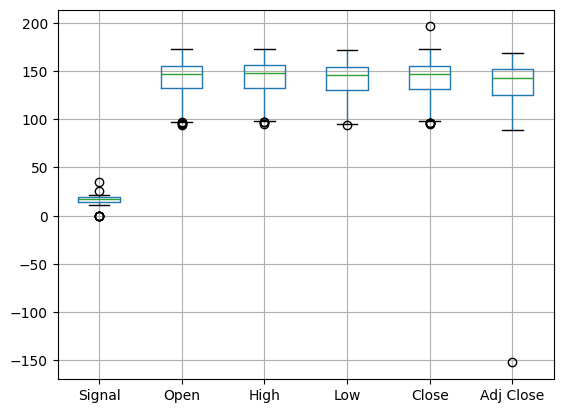

In [3]:
df.boxplot()
plt.show()

### Data summary

In [4]:
df.describe()

Date       Signal         Open         High  \
count                           1038  1038.000000  1038.000000  1038.000000   
mean   2017-12-11 17:03:48.901734144    16.766190   141.847360   142.691801   
min              2015-11-19 00:00:00     0.000000    94.080002    95.400002   
25%              2016-11-30 06:00:00    14.691150   132.132496   132.912495   
50%              2017-12-09 12:00:00    17.298240   146.769997   147.959999   
75%              2018-12-23 06:00:00    19.030890   155.367496   156.287495   
max              2020-01-06 00:00:00    35.434147   172.789993   173.389999   
std                              NaN     3.095783    18.475574    18.470255   

               Low        Close    Adj Close  
count  1038.000000  1038.000000  1038.000000  
mean    140.907746   141.840973   136.341060  
min      93.639999    94.790001  -152.277847  
25%     130.542503   131.824993   125.290491  
50%     145.634995   146.885002   142.667732  
75%     154.422500   155.289993   151.798325  
max     171.949997   196.279999   168.842270  
std      18.404504    18.497010    21.427837

### Plot

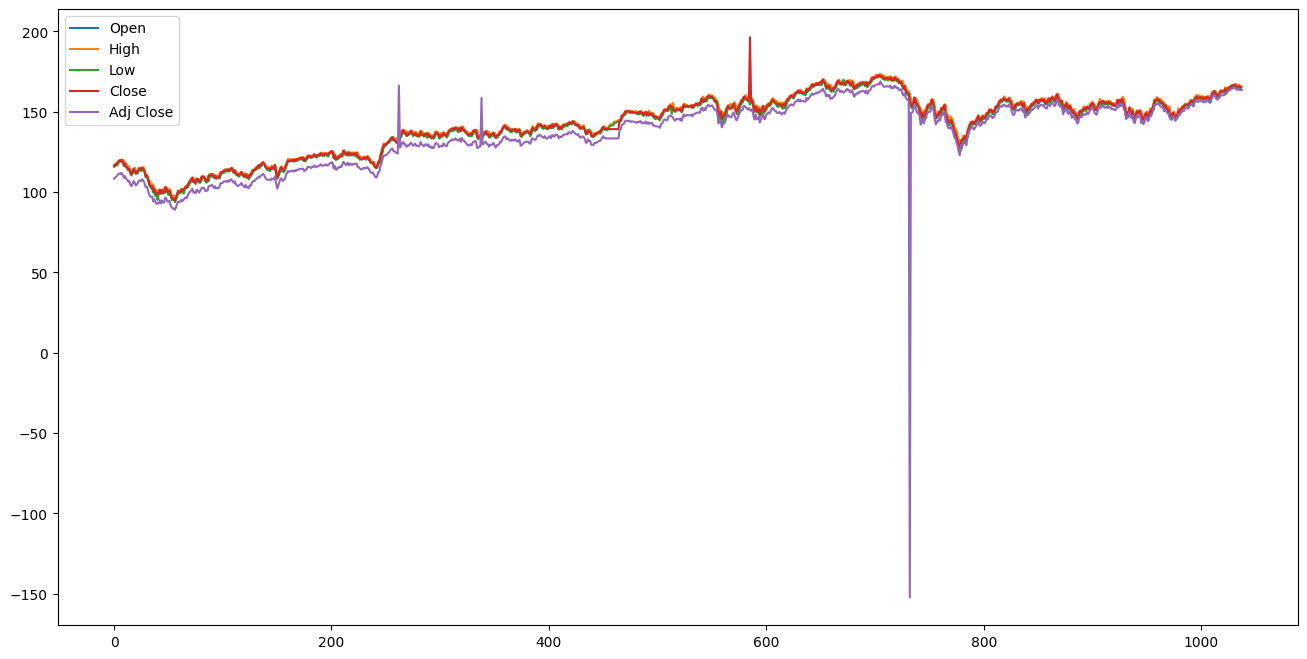

In [5]:
df.drop(['Signal', 'Date'], axis=1).plot(figsize=(16,8))
plt.show()

- There are some abnormal strikes in mutilple columns...

## Issue 1:  Negative `Adj Close` 
- `Adj Close` has a negtaive `min` value
- The average of `Adj Close` is significantly smaller than that of `Close` 

In [6]:
criteria = df['Adj Close'] < 0
df[criteria]

Date     Signal        Open        High         Low       Close  \
732 2018-10-10  19.719477  160.820007  160.990005  156.360001  156.559998   

      Adj Close  
732 -152.277847

## Correction
- Patching `Adj Close` value to `close`

In [7]:
df['Adj Close'] = np.where(df['Adj Close'].le(0), df['Close'], df['Adj Close'])
df.iloc[732]

Date         2018-10-10 00:00:00
Signal                 19.719477
Open                  160.820007
High                  160.990005
Low                   156.360001
Close                 156.559998
Adj Close             156.559998
Name: 732, dtype: object

## Issue 2. `High` value is not the highest among columns
- There exists value (strikes) in `Close`, `Open`, `Adj Close` columns that are larger than `High`

## Correction:
- Drop rows with `Close`, `Open`, `Adj Close` values that are larger than `High`

In [8]:
cols = {"Open", "High", "Low", "Close",	"Adj Close"}
def get_abnormal_high_index():
    rows = []
    for col in cols:
        rows.extend(df.index[df[col] > df['High']].tolist())
    print("=== Rows to be dropped ===")
    print(df.iloc[rows])
    print("==========================")
    return rows
df = df.drop(index=get_abnormal_high_index())
df

=== Rows to be dropped ===
          Date     Signal        Open        High         Low       Close  \
577 2018-03-07  18.885411  154.460007  156.929993  157.220001  156.740005   
671 2018-07-16  20.010313  167.759995  168.029999  169.960007  166.770004   
431 2017-08-07  16.298805  140.440002  140.350000  139.710007  140.440002   
262 2016-12-05  16.011011  131.970001  133.330002  131.889999  133.149994   
338 2017-03-27  16.032241  132.759995  135.070007  132.399994  134.740005   
431 2017-08-07  16.298805  140.440002  140.350000  139.710007  140.440002   
585 2018-03-19  18.660897  157.169998  157.210007  154.449997  196.279999   
766 2018-12-06  16.904044  145.449997  147.099997  143.429993  147.199997   
983 2019-10-17  18.878412  152.289993  153.309995  152.050003  153.339996   

      Adj Close  
577  151.151840  
671  161.779312  
431  134.595871  
262  166.175079  
338  158.577637  
431  134.595871  
585  150.708221  
766  143.173874  
983  151.102173  


Date     Signal        Open        High         Low       Close  \
0    2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
1    2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2    2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
3    2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
4    2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
...         ...        ...         ...         ...         ...         ...   
1033 2019-12-30   0.000000  165.979996  166.210007  164.570007  165.440002   
1034 2019-12-31   0.000000  165.080002  166.350006  164.710007  165.669998   
1035 2020-01-02   0.000000  166.740005  166.750000  164.229996  165.779999   
1036 2020-01-03   0.000000  163.740005  165.410004  163.699997  165.130005   
1037 2020-01-06   0.000000  163.850006  165.539993  163.539993  165.350006   

       Adj Close  
0     108.281601  
1     108.981323  
2     109.522453  
3     110.324837  
4     111.183159  
...          ...  
1033  163.623688  
1034  163.851135  
1035  163.959946  
1036  163.317093  
1037  163.534668  

[1030 rows x 7 columns]

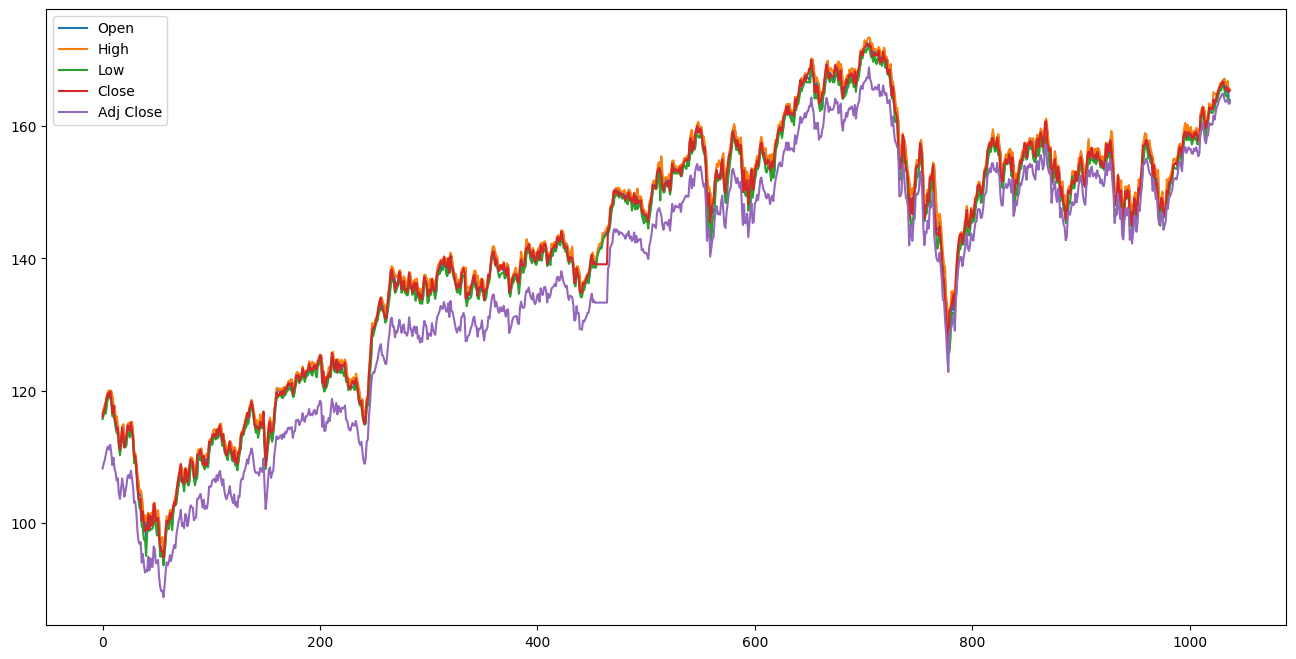

In [9]:
df.drop(['Date', 'Signal'], axis = 1).plot(figsize=(16,8))
plt.show()

- Strikers were gone
- After removing rows with abnormal values, we again check the discrepancy between `Close` and `Adj Close`
#### We draw z-score on `diff = df['Close'] - df['Adj Close']` to check possible outliers

In [10]:
df['diff'] = np.abs(df['Close'] - df['Adj Close'])
df['diff'].describe()
print(f"There is {len(df[(df['diff'] - df['diff'].mean()) >  2.8 * df['diff'].std()])} row with abs(diff) >= 2 s.d.")

There is 0 row with abs(diff) >= 2 s.d.


- As there is no more row with abs(diff) >= 2 s.d., we believe the price data is now valid for further evaluation

## Issue 2. Invalid value in `Signal` column
- The `Signal` values in the last few rows appear to be `0`
- There exists `Signal` values that are abnormally high 

In [11]:
df['Signal'].describe()
df[(np.abs(df['Signal'] - df['Signal'].mean())) >  3* df['Signal'].std()]

Date     Signal        Open        High         Low       Close  \
500  2017-11-13  35.434147  145.929993  146.820007  145.500000  146.610001   
731  2018-10-09  26.124873  161.619995  162.740005  160.979996  161.190002   
1032 2019-12-27   0.000000  167.119995  167.119995  165.429993  165.860001   
1033 2019-12-30   0.000000  165.979996  166.210007  164.570007  165.440002   
1034 2019-12-31   0.000000  165.080002  166.350006  164.710007  165.669998   
1035 2020-01-02   0.000000  166.740005  166.750000  164.229996  165.779999   
1036 2020-01-03   0.000000  163.740005  165.410004  163.699997  165.130005   
1037 2020-01-06   0.000000  163.850006  165.539993  163.539993  165.350006   

       Adj Close      diff  
500   140.849274  5.760727  
731   156.781219  4.408783  
1032  164.039063  1.820938  
1033  163.623688  1.816314  
1034  163.851135  1.818863  
1035  163.959946  1.820053  
1036  163.317093  1.812912  
1037  163.534668  1.815338

## Correction:
- It is reasonable to drop rows from 1032 - 1037 are outliers with `Signal` = `0`


In [12]:
df = df.drop(df[df['Signal'] == 0].index.tolist())
df

Date     Signal        Open        High         Low       Close  \
0    2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
1    2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2    2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
3    2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
4    2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   
...         ...        ...         ...         ...         ...         ...   
1027 2019-12-19  20.223888  165.279999  165.729996  164.880005  165.729996   
1028 2019-12-20  19.858758  166.149994  166.410004  165.720001  165.970001   
1029 2019-12-23  20.855705  166.240005  166.360001  165.360001  166.300003   
1030 2019-12-24  21.361876  166.449997  166.699997  166.039993  166.679993   
1031 2019-12-26  20.016643  166.830002  166.979996  166.360001  166.679993   

       Adj Close      diff  
0     108.281601  7.778397  
1     108.981323  7.828675  
2     109.522453  7.867546  
3     110.324837  7.925163  
4     111.183159  7.986839  
...          ...       ...  
1027  163.910477  1.819519  
1028  164.147858  1.822143  
1029  164.474243  1.825760  
1030  164.850052  1.829941  
1031  164.850052  1.829941  

[1024 rows x 8 columns]

2. Now we handle abnormally high `Signal` value

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
bad_signal_rows = df[(np.abs(df['Signal'] - df['Signal'].mean())) >  3* df['Signal'].std()]
bad_signal_rows

Date     Signal        Open        High         Low       Close  \
497 2017-11-13  35.434147  145.929993  146.820007  145.500000  146.610001   
725 2018-10-09  26.124873  161.619995  162.740005  160.979996  161.190002   

      Adj Close      diff  
497  140.849274  5.760727  
725  156.781219  4.408783

- Lets draw the plot to observe the trend

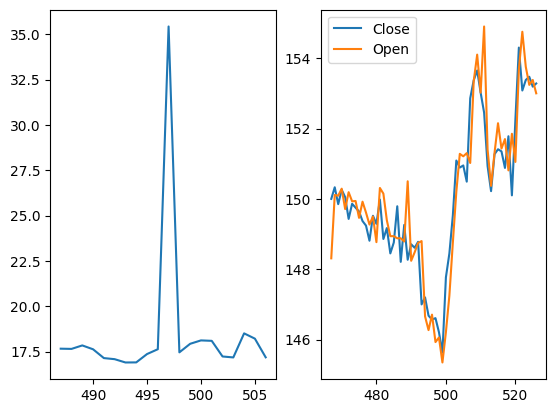

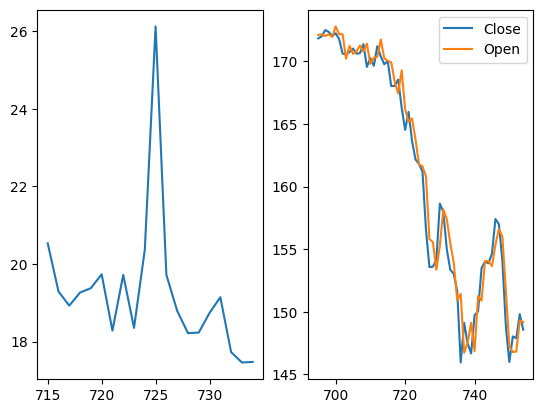

In [15]:
affected_rows = bad_signal_rows.index
for i in affected_rows:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    df['Signal'].iloc[i - 10: i + 10].plot(ax=axes[0])
    df[['Close', 'Open']].iloc[i - 30: i + 30].plot(ax=axes[1])
    plt.show()

- Without a sudden strike in price, the `Signal` should not behave as high as shown

## Correction:
- Without sufficient information and context of what `Signal` is, one simplest way is to patch the data using the average of signal within -5/+5 days


In [16]:
# Calculate the average nearby using windows
windows_size = 5
df['Avg_Signal_Nearby'] = (df['Signal'].rolling(window=windows_size, center = True).sum() - df['Signal']) / (windows_size - 1)

for i in affected_rows:
    df.loc[i, 'Signal'] = df['Avg_Signal_Nearby'].iloc[i]

df.iloc[list(affected_rows)]

Date     Signal        Open        High         Low       Close  \
497 2017-11-13  17.593567  145.929993  146.820007  145.500000  146.610001   
725 2018-10-09  19.309081  161.619995  162.740005  160.979996  161.190002   

      Adj Close      diff  Avg_Signal_Nearby  
497  140.849274  5.760727          17.593567  
725  156.781219  4.408783          19.309081

- In fact, applying regression to obtain the fitted `Signal` for such data patching is also possible but will not be performed due to simplicity

In [17]:
df = df.drop(['diff','Avg_Signal_Nearby'], axis = 1)

---
# Task 2
Evaluate the signal’s effectiveness or lack thereof in forecasting


## 1. Correlation Analysis
Without any contextual meaning of the `Signal`, by evaluating the statistical correlation between `Signal` ETF price, we can know
1. Relationship: A strong positive or negative correlation might indicate a potential forecasting relationship.
2. Reliability: Consistency of the trading signal about the outcomes over time. A consistent correlation indicates that the signal is reliable and may have long-term effectiveness.
- We may try to compute the correlation of `Signal` with `lag` price features by shifting D+1 for forecasting purposees

In [18]:
# compute lagged features
df_lagged = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].shift(-1)
df_combined = pd.concat([df['Signal'], df_lagged], axis=1)
df_combined = df_combined[:-1]
df_combined


Signal        Open        High         Low       Close   Adj Close
0     13.768540  116.480003  117.360001  116.379997  116.809998  108.981323
1     13.608819  116.709999  117.889999  116.680000  117.389999  109.522453
2     12.990589  116.879997  118.419998  116.559998  118.250000  110.324837
3     12.667435  118.300003  119.320000  118.110001  119.169998  111.183159
4     13.019910  119.269997  119.900002  118.879997  119.620003  111.602997
...         ...         ...         ...         ...         ...         ...
1018  19.881534  165.279999  165.729996  164.880005  165.729996  163.910477
1019  20.223888  166.149994  166.410004  165.720001  165.970001  164.147858
1020  19.858758  166.240005  166.360001  165.360001  166.300003  164.474243
1021  20.855705  166.449997  166.699997  166.039993  166.679993  164.850052
1022  21.361876  166.830002  166.979996  166.360001  166.679993  164.850052

[1023 rows x 6 columns]

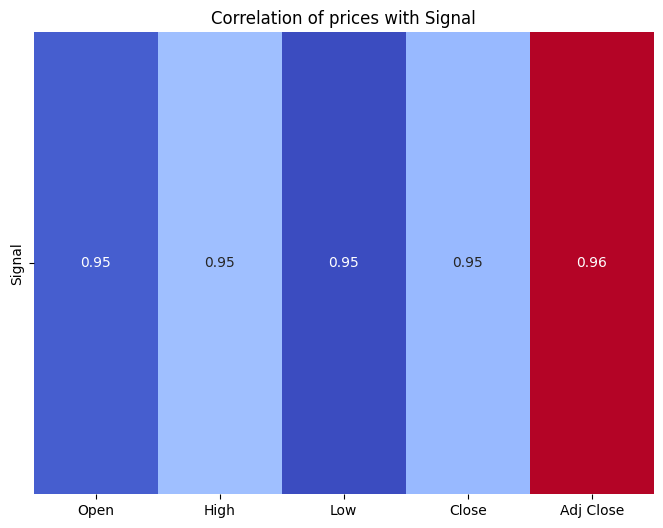

Open         0.952549
High         0.954884
Low          0.952182
Close        0.954716
Adj Close    0.961089
Name: Signal, dtype: float64

In [19]:
crrelation_matrix_lagged = df_combined.corr()
signal_correlations = crrelation_matrix_lagged['Signal'].drop('Signal')
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(signal_correlations.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation of prices with Signal')
plt.show()
signal_correlations


- The correlation coefficients between the "Signal" and all price columns (Open, High, Low, Close, Adj Close) are very high, ranging from approximately 0.95 to 0.96.
The values being close to 1 indicate a strong positive `linear relationship` between the "Signal" and each of the price columns.

- "Signal" effectively captures relevant information that aligns with the price movements represented by the different columns.



## 2. Regression Analysis
- Train a regression model to predict the price on `D+1` day using `Signal`

In [20]:
from sklearn.model_selection import train_test_split

X = df_combined[['Signal']]
y = df_combined['Adj Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df_combined.isnull().values.any()

False

In [22]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## MSE and $R^{2}$ score for the model

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 24.85373222777754
R-squared: 0.9341185026895864


## Residue plot


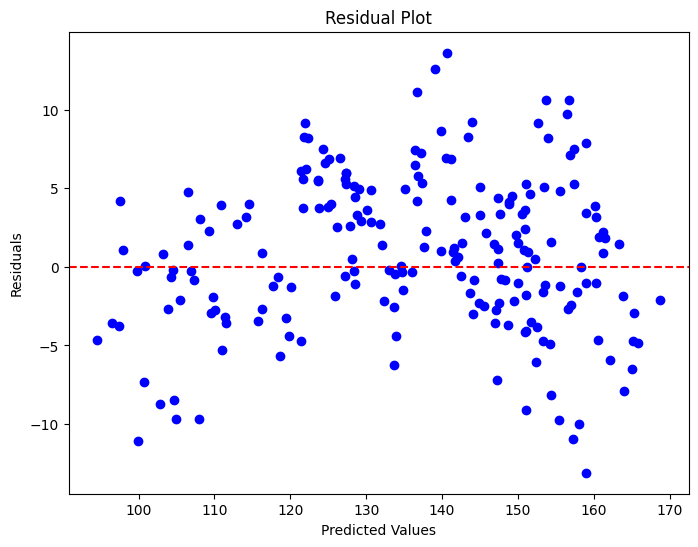

In [24]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [25]:
df['Adj Close'].describe()

count    1024.000000
mean      136.358660
std        19.425399
min        88.820946
25%       124.561774
50%       142.415260
75%       151.554466
max       168.842270
Name: Adj Close, dtype: float64

- The high R-squared value of approximately 0.93 indicates that the model fits the data well and can explain a large proportion of the variance in the target variable using the provided feature.
- While the `mse` yields 24.85, it is only slightly higher than the standard deviation of the price.
- A backtesting with a strategy may be required to evaluate if the `mse` is in an acceptable range based of the P&L percentage

---
Part 3:  Summary
--
With the insufficient context of what the signal indicates (economic statistics/oscillator index etc), we cannot draw an indicator/rules/decisions boundary for a binary signal.
That said, we should perform backtesting with action signals such as crossover with moving averages to define our trade strategies. To further proceed we may evaluate the signal for ETFs with higher volatility such as average ETF, if the signal gives us consistent and robust indication under dip and rapid correction, it could be more reliable for usage.
If we decide to proceed with this, the further effort may also be required comparison with others traditional trading signal/indicators such as SMA, MACD, or Fibonacci Retracement 
